# Imports

In [94]:
import numpy as np 
import pandas as pd 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/nyse/prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

print('\nNumber of different Stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

Number of different Stocks:  501
['KORS', 'FAST', 'DHR', 'OMC', 'MLM', 'CCI', 'IRM', 'DISCA', 'MNK', 'UAL']


In [3]:
df.tail()


,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [4]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


# Yahoo data plot

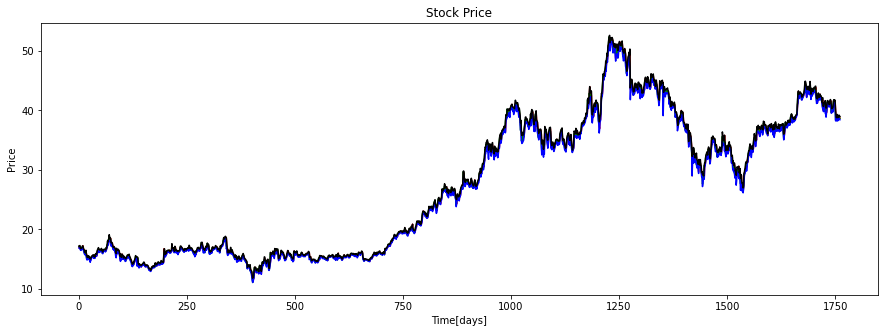

In [6]:

plt.figure(figsize=(15, 5))
plt.plot(df[df.symbol == 'YHOO'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'YHOO'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'YHOO'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'YHOO'].high.values, color='black', label='high')
plt.title('Stock Price')
plt.xlabel('Time[days]')
plt.ylabel('Price')
#plt.legend(loc='best')
plt.show()

# Function to Normalize the data

In [7]:
def normalize_data(df):
    min_max_scaler = MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# Function to create Train/Validation/Test data of a particular Stock data

In [27]:
def create_data(stock, seq_len):
    data_raw = stock.to_numpy()    #convert to numpy array
    data = []
    
    #Create all possible sequences of length seq_len
    
    for idx in range(len(data_raw) - seq_len): 
        data.append(data_raw[idx: idx + seq_len])
    percentage_of_val_set = 10 
    percentage_of_test_set = 10   
    data = np.array(data);
    validation_set_size = int(np.round(percentage_of_val_set/100*data.shape[0]));  
    test_set_size = int(np.round(percentage_of_test_set/100*data.shape[0]));
    train_set_size = data.shape[0] - (validation_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+validation_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+validation_set_size,-1,:]
    
    x_test = data[train_set_size+validation_set_size:,:-1,:]
    y_test = data[train_set_size+validation_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

Removing the column 'Symbol' and 'Volume'

In [70]:

df_stock= pd.read_csv("../input/nyse/prices.csv", index_col = 0)

df_stock = df[df.symbol == 'YHOO'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)


Normalization of the data


In [71]:
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)
df_stock_norm.shape

(1762, 4)

Create Train/Validation/Test data

In [95]:
seq_len = 20        
train_x, train_y, val_x, val_y, test_x, test_y = create_data(df_stock_norm, seq_len)


# Graph of Normalized stock prices of 'YHOO'


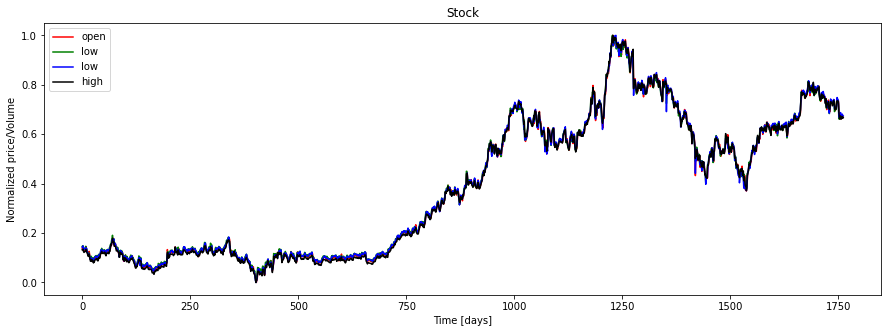

In [98]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')


plt.title('Stock')
plt.xlabel('Time [days]')
plt.ylabel('Normalized price/Volume')
plt.legend(loc='best')
plt.show()

#  **LSTM Model**

In [99]:


lstm_model = Sequential()

lstm_model.add(LSTM(input_shape = (19, 4), units = 50, return_sequences=True)) 
lstm_model.add(Dropout(0.2))                                                   

lstm_model.add(LSTM(100, return_sequences = False))                           
lstm_model.add(Dropout(0.2))                                                   

lstm_model.add(Dense(units=4))                                                 
lstm_model.add(Activation('linear'))


'''Compiling the model'''

lstm_model.compile(loss='mse', optimizer='rmsprop', metrics = ['accuracy'])


In [100]:

lstm_model.fit(train_x, train_y, batch_size=128, epochs=5, validation_data=(val_x, val_y))

Train on 1394 samples, validate on 174 samples
Epoch 1/5
1394/1394 [==============================] - 1s 892us/step - loss: 0.0411 - accuracy: 0.2317 - val_loss: 0.0071 - val_accuracy: 0.3161
Epoch 2/5
1394/1394 [==============================] - 1s 382us/step - loss: 0.0069 - accuracy: 0.2389 - val_loss: 0.0083 - val_accuracy: 0.3621
Epoch 3/5
1394/1394 [==============================] - 1s 373us/step - loss: 0.0075 - accuracy: 0.2654 - val_loss: 0.0040 - val_accuracy: 0.3103
Epoch 4/5
1394/1394 [==============================] - 1s 379us/step - loss: 0.0061 - accuracy: 0.2855 - val_loss: 0.0025 - val_accuracy: 0.3103
Epoch 5/5
1394/1394 [==============================] - 1s 382us/step - loss: 0.0068 - accuracy: 0.3027 - val_loss: 0.0035 - val_accuracy: 0.2011


In [101]:
closing_price = lstm_model.predict(test_x)

In [102]:
output=(np.mean(closing_price))
output

0.63433874